In [16]:
import numpy as np
import matplotlib.pyplot as plt
import mpldatacursor
import random


file = 'Sample data-1-IRIS.TXT'

data = np.loadtxt(file,delimiter="\t",skiprows=3)

print(data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [17]:
matrix = np.corrcoef(data)

means = np.mean(matrix, axis = 1)

matrix_mean_subtracted = matrix - means.reshape(-1,1)

digitized_matrix = (matrix_mean_subtracted > 0).astype(int)


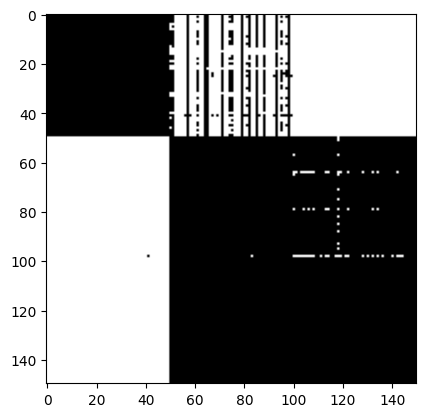

In [18]:
binary_cmap = plt.cm.get_cmap('binary')
fig, ax = plt.subplots()
im = ax.imshow(digitized_matrix, cmap=binary_cmap)

plt.show()

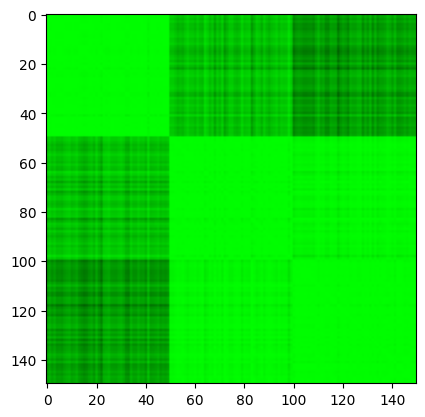

In [19]:
max_vals = np.max(matrix, axis=1)

scaled_matrix = matrix / max_vals

# Multiply the scaled matrix by 255 to get values in the range 0 to 255
scaled_matrix *= 255

rgb = np.zeros((matrix.shape[0], matrix.shape[1], 3), dtype=np.uint8)

# Set the green channel to the scaled matrix values
rgb[:, :, 1] = scaled_matrix.astype(np.uint8)

# Display the image using matplotlib
plt.imshow(rgb)
plt.show()

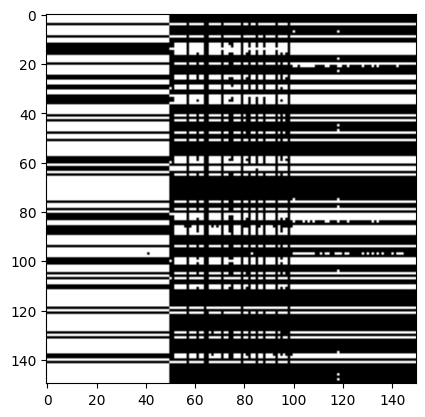

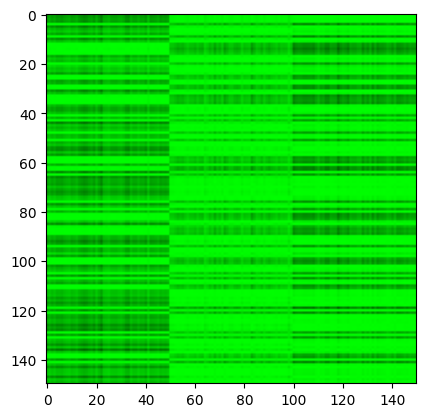

In [40]:
np.random.shuffle(matrix)

means_permuted = np.mean(matrix, axis = 1)
matrix_mean_subtracted_permuted = matrix - means_permuted.reshape(-1,1)
digitized_matrix_permuted = (matrix_mean_subtracted_permuted > 0).astype(int)

binary_cmap = plt.cm.get_cmap('binary')
fig, ax = plt.subplots()
im = ax.imshow(digitized_matrix_permuted, cmap=binary_cmap)

plt.show()

max_vals = np.max(matrix, axis=1)
scaled_matrix = matrix / max_vals
scaled_matrix *= 255

rgb = np.zeros((matrix.shape[0], matrix.shape[1], 3), dtype=np.uint8)
rgb[:, :, 1] = scaled_matrix.astype(np.uint8)
plt.imshow(rgb)
plt.show()

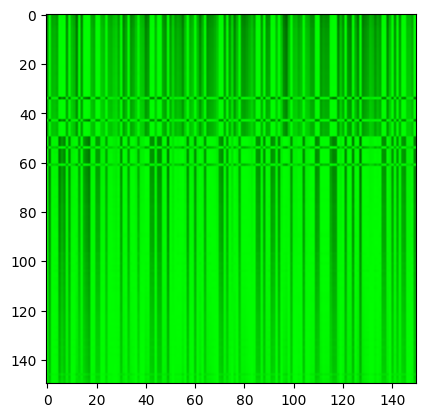

In [41]:
# Recover the image clusters using Signature technique
row_sums = np.sum(matrix, axis=1)
row_means = np.mean(matrix, axis=1)
signatures = row_sums * row_means

# Rearrange (sort) the Similarity Matrix by signature value of each row
sorted_indices = np.argsort(signatures)
sorted_matrix = matrix[sorted_indices, :][:, sorted_indices]

max_vals = np.max(sorted_matrix, axis=1)
scaled_matrix = sorted_matrix / max_vals

scaled_matrix *= 255
rgb = np.zeros((matrix.shape[0], matrix.shape[1], 3), dtype=np.uint8)
rgb[:, :, 1] = scaled_matrix.astype(np.uint8)
plt.imshow(rgb)
plt.show()

In [64]:
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.cluster import hierarchy
from scipy.sparse import csr_matrix

# Calculate correlation matrix
correlation_matrix = 1 - squareform(pdist(matrix, metric='correlation'))

# Set threshold for edge weight
threshold = 0.7

# Remove edges with weights below threshold
correlation_matrix[correlation_matrix < threshold] = 0

# Convert correlation matrix to binary matrix
adjacency_matrix = np.zeros_like(correlation_matrix)

adjacency_matrix = (correlation_matrix >= threshold).astype(int)

# Convert adjacency matrix to sparse matrix
graph = csr_matrix(adjacency_matrix)

# Calculate node weights
node_weights = np.sum(adjacency_matrix, axis=1)


In [65]:
# Find clusters
clusters = []
while node_weights.max() > 0:
    # Get node with highest weight
    node = np.argmax(node_weights)
    
    # Get neighbors
    neighbors = np.where(graph[:,node].todense() > 0)[0]
    
    # Add cluster to list
    clusters.append(neighbors.tolist())
    
    # Remove nodes and edges from graph
    graph[neighbors,:] = 0
    graph[:,neighbors] = 0
    node_weights[neighbors] = 0
    
    

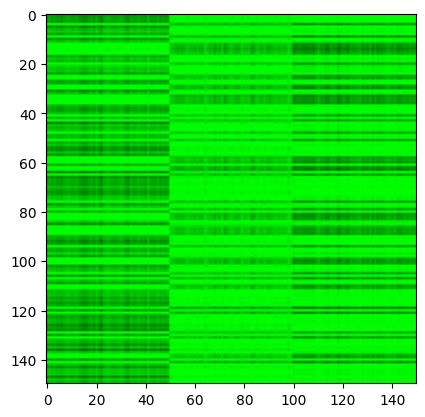

[[0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 17, 18, 19, 21, 22, 23, 24, 27, 28, 31, 32, 37, 38, 39, 40, 42, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 61, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 80, 84, 85, 90, 91, 92, 93, 95, 96, 97, 98, 102, 103, 104, 106, 108, 109, 112, 113, 114, 115, 116, 117, 118, 120, 122, 123, 124, 125, 126, 127, 128, 130, 132, 133, 134, 135, 136, 137, 140, 142, 143, 144, 145, 146, 147, 148, 149], [4, 9, 12, 13, 14, 15, 16, 20, 25, 26, 29, 30, 33, 34, 35, 36, 41, 43, 48, 51, 58, 59, 60, 62, 63, 65, 76, 79, 81, 82, 83, 86, 87, 88, 89, 94, 99, 100, 101, 105, 107, 110, 111, 119, 121, 129, 131, 138, 139, 141]]
Cluster 1: [0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 17, 18, 19, 21, 22, 23, 24, 27, 28, 31, 32, 37, 38, 39, 40, 42, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 61, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 80, 84, 85, 90, 91, 92, 93, 95, 96, 97, 98, 102, 103, 104, 106, 108, 109, 112, 113, 114, 115, 116, 117, 118, 120, 122, 123, 124, 125, 126, 127,

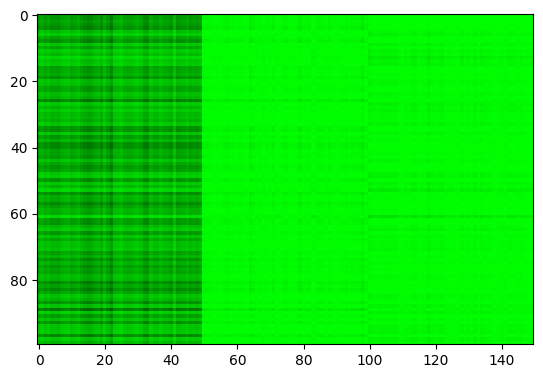

Cluster 2: [4, 9, 12, 13, 14, 15, 16, 20, 25, 26, 29, 30, 33, 34, 35, 36, 41, 43, 48, 51, 58, 59, 60, 62, 63, 65, 76, 79, 81, 82, 83, 86, 87, 88, 89, 94, 99, 100, 101, 105, 107, 110, 111, 119, 121, 129, 131, 138, 139, 141]


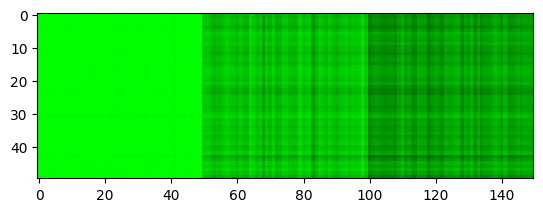

In [66]:

# Visualize clusters
max_vals = np.max(matrix, axis=1)
scaled_matrix = matrix / max_vals[:, np.newaxis]  # scale each row separately

# Multiply the scaled matrix by 255 to get values in the range 0 to 255
scaled_matrix *= 255

# Create a color-coded image of the matrix
rgb = np.zeros((matrix.shape[0], matrix.shape[1], 3), dtype=np.uint8)
rgb[:, :, 1] = scaled_matrix.astype(np.uint8)  # set green channel to the scaled matrix values

# Display the image using matplotlib
plt.imshow(rgb)
plt.show()

print(clusters)

# Visualize clusters
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {cluster}")
    cluster_matrix = matrix[cluster,:]
    max_vals = np.max(cluster_matrix, axis=1)
    scaled_matrix = cluster_matrix / max_vals[:, np.newaxis]  # scale each row separately

    # Multiply the scaled matrix by 255 to get values in the range 0 to 255
    scaled_matrix *= 255

    # Create a color-coded image of the cluster
    rgb = np.zeros((cluster_matrix.shape[0], cluster_matrix.shape[1], 3), dtype=np.uint8)
    rgb[:, :, 1] = scaled_matrix.astype(np.uint8)  # set green channel to the scaled matrix values

    # Display the image using matplotlib
    plt.imshow(rgb)
    plt.show()